In [1]:
import numpy as np

# Comparison of Extragradient and Goldstein-Levitin-Polyak Methods for Variational Inequalities

## Introduction

Variational Inequalities (VIs) are powerful mathematical frameworks for modeling equilibrium problems. This document compares two fundamental methods for solving VIs:

- Goldstein-Levitin-Polyak (GLP) Projection Method

- Extragradient (EG) Method

Problem Formulation

Given:

- Feasible set: $C = \{(x,y)| x\in[-1,1], y\in[-1,1] \}$

- Operator: $F(x, y) = (-y, x)$

- Solution: $(x^*, y^*) = (0, 0)$

Key Properties


- Feasibility: The feasible set $C$ is compact and convex.

- Monotone: $\langle F(u) - F(v), u - v \rangle = 0$

- Not strongly monotone.

- Lipschitz-continuous with $L = 1$

## Algorithm Comparison
### Goldstein-Levitin-Polyak (GLP) Method

$x_{k} = P_{C}(x_k - \gamma F(x_k))$

Convergence Requirements:

- Strongly monotone operator

- Step size: $\gamma \in (0, 2\mu/L^2)$

Limitations:

- Fails for merely monotone operators

- Prone to oscillations and divergence

## Extragradient Method

Prediction:

$\hat{x}_{k} = P_{C}(x_k - \gamma F(x_k))$

Correction:

$x_{k+1} = P_{C}(x_k - \gamma F(\hat{x}_k))$

Where $P_C$ is the projection onto the feasible set $C$.

Convergence Requirements:

- Monotone + Lipschitz operator

- Step size: $\gamma \in (0, 1/L)$

Advantages:

- Handles merely monotone operators

- Robust convergence behavior

- Prevents oscillation through prediction step





In [2]:
# Projection onto box constraint [-1, 1] x [-1, 1]
def project_C(x):
    return np.clip(x, -1.0, 1.0)

# Operator F(x) = (-y, x) for input vector (x, y)
def F(x):
    return np.array([-x[1], x[0]])

# Goldstein-Levitin-Polyak (GLP) Projection Method
def glp_projection(x0, gamma, max_iter=20):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    
    for _ in range(max_iter):
        x_next = project_C(x - gamma * F(x))
        x = x_next
        history.append(x.copy())
        
    return np.array(history)

# Extragradient Method
def extragradient(x0, gamma, max_iter=20):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    
    for _ in range(max_iter):
        # Prediction step
        y_hat = project_C(x - gamma * F(x))
        # Correction step
        x_next = project_C(x - gamma * F(y_hat))
        x = x_next
        history.append(x.copy())
        
    return np.array(history)

# Parameters
x0 = [1.0, 0.5]   # Initial point
gamma = 0.5        # Step size
max_iter = 30      # Number of iterations

# Run both methods
glp_path = glp_projection(x0, gamma, max_iter)
eg_path = extragradient(x0, gamma, max_iter)

# Calculate distance to solution (0,0)
glp_dist = np.linalg.norm(glp_path, axis=1)
eg_dist = np.linalg.norm(eg_path, axis=1)

# Print results
print("GLP Projection Method:")
print(f"{'Iter':<6}{'x':<10}{'y':<10}{'Distance to (0,0)':<15}")
for i, (point, dist) in enumerate(zip(glp_path, glp_dist)):
    print(f"{i:<6}{point[0]:<10.6f}{point[1]:<10.6f}{dist:<15.6f}")

print("\nExtragradient Method:")
print(f"{'Iter':<6}{'x':<10}{'y':<10}{'Distance to (0,0)':<15}")
for i, (point, dist) in enumerate(zip(eg_path, eg_dist)):
    print(f"{i:<6}{point[0]:<10.6f}{point[1]:<10.6f}{dist:<15.6f}")

GLP Projection Method:
Iter  x         y         Distance to (0,0)
0     1.000000  0.500000  1.118034       
1     1.000000  0.000000  1.000000       
2     1.000000  -0.500000 1.118034       
3     0.750000  -1.000000 1.250000       
4     0.250000  -1.000000 1.030776       
5     -0.250000 -1.000000 1.030776       
6     -0.750000 -0.875000 1.152443       
7     -1.000000 -0.500000 1.118034       
8     -1.000000 0.000000  1.000000       
9     -1.000000 0.500000  1.118034       
10    -0.750000 1.000000  1.250000       
11    -0.250000 1.000000  1.030776       
12    0.250000  1.000000  1.030776       
13    0.750000  0.875000  1.152443       
14    1.000000  0.500000  1.118034       
15    1.000000  0.000000  1.000000       
16    1.000000  -0.500000 1.118034       
17    0.750000  -1.000000 1.250000       
18    0.250000  -1.000000 1.030776       
19    -0.250000 -1.000000 1.030776       
20    -0.750000 -0.875000 1.152443       
21    -1.000000 -0.500000 1.118034       
22    -1.

## Key Insight

The extragradient method succeeds where GLP fails due to its prediction-correction mechanism:

Prediction step: Probes the operator at a future point

Correction step: Adjusts using updated information
This compensates for the lack of strong monotonicity and prevents oscillations.

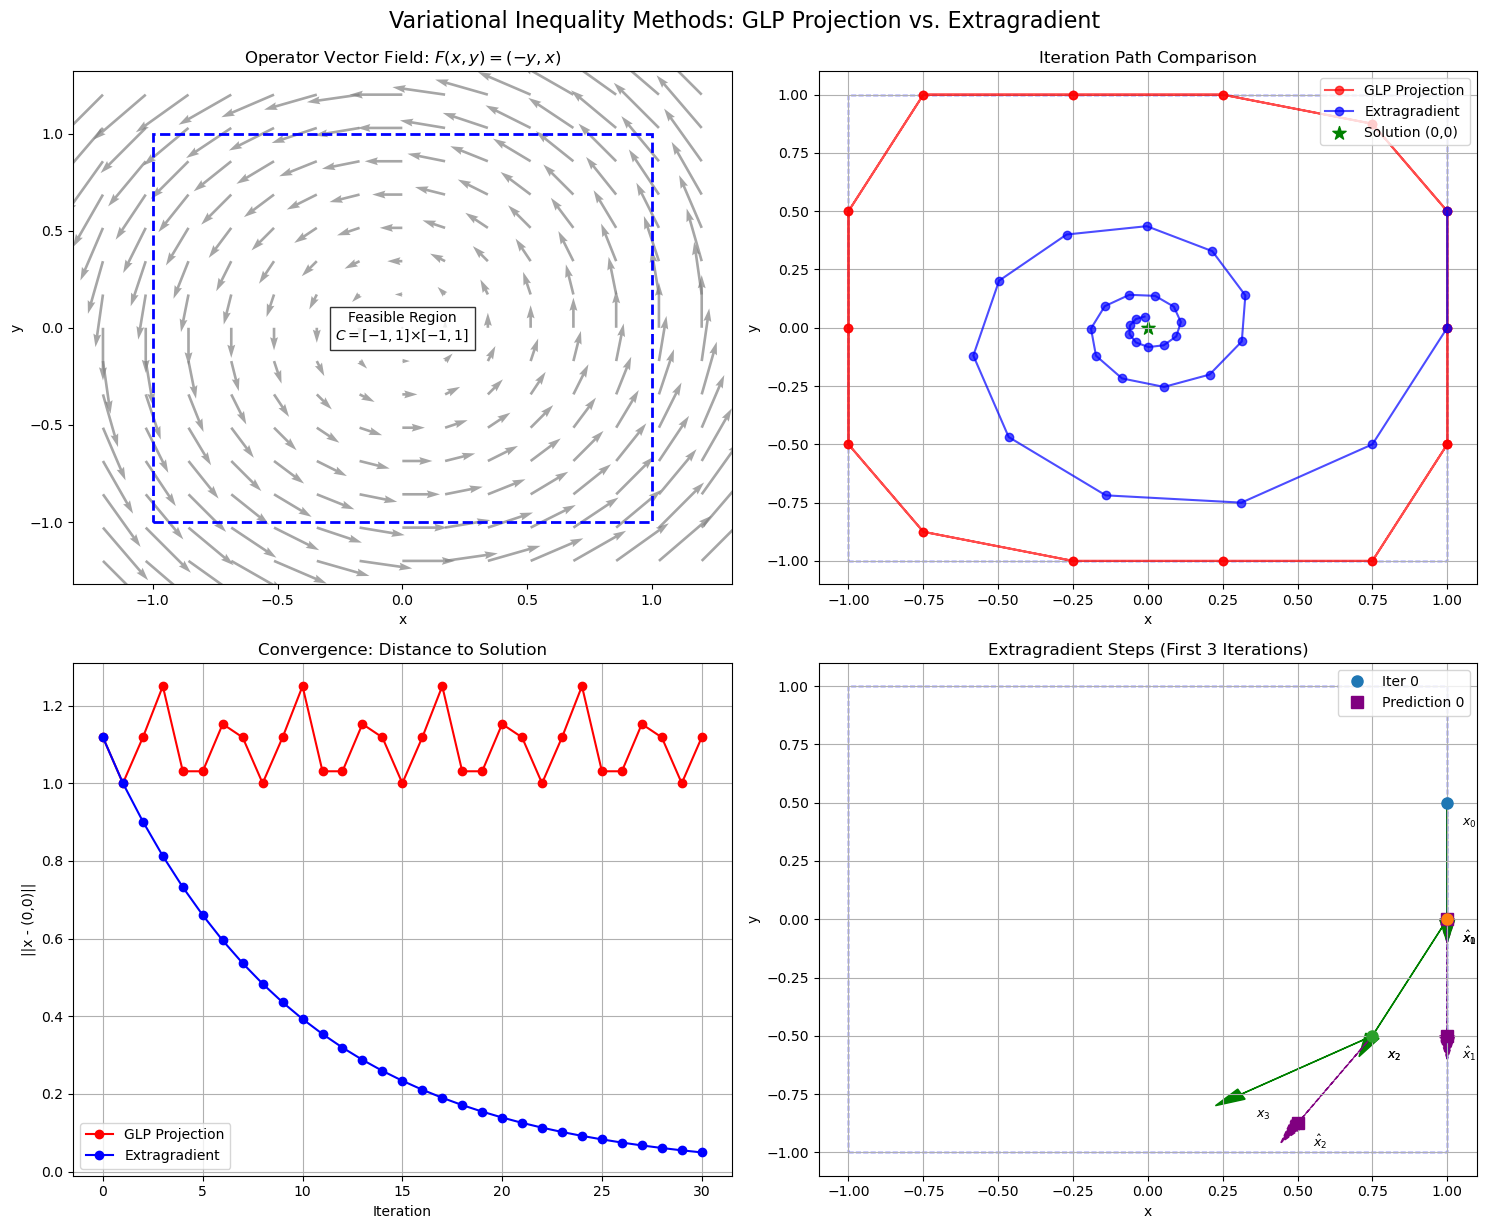

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Projection onto box constraint [-1, 1] x [-1, 1]
def project_C(x):
    return np.clip(x, -1.0, 1.0)

# Operator F(x) = (-y, x) for input vector (x, y)
def F(x):
    return np.array([-x[1], x[0]])

# Goldstein-Levitin-Polyak (GLP) Projection Method
def glp_projection(x0, gamma, max_iter=20):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    
    for _ in range(max_iter):
        x_next = project_C(x - gamma * F(x))
        x = x_next
        history.append(x.copy())
        
    return np.array(history)

# Extragradient Method
def extragradient(x0, gamma, max_iter=20):
    x = np.array(x0, dtype=float)
    history = [x.copy()]
    
    for _ in range(max_iter):
        # Prediction step
        y_hat = project_C(x - gamma * F(x))
        # Correction step
        x_next = project_C(x - gamma * F(y_hat))
        x = x_next
        history.append(x.copy())
        
    return np.array(history)

# Parameters
x0 = [1.0, 0.5]   # Initial point
gamma = 0.5        # Step size
max_iter = 30      # Number of iterations

# Run both methods
glp_path = glp_projection(x0, gamma, max_iter)
eg_path = extragradient(x0, gamma, max_iter)

# Create visualization
plt.figure(figsize=(15, 12))

# 1. Vector Field Visualization
plt.subplot(2, 2, 1)
x_grid, y_grid = np.meshgrid(np.linspace(-1.2, 1.2, 15), np.linspace(-1.2, 1.2, 15))
Fx = -y_grid
Fy = x_grid
plt.quiver(x_grid, y_grid, Fx, Fy, scale=15, color='gray', alpha=0.7)
plt.title('Operator Vector Field: $F(x,y) = (-y, x)$')
plt.xlabel('x')
plt.ylabel('y')

# Add feasible region
plt.gca().add_patch(Rectangle((-1, -1), 2, 2, fill=False, edgecolor='blue', linestyle='--', linewidth=2))
plt.text(0, 0, 'Feasible Region\n$C = [-1,1]×[-1,1]$', 
         ha='center', va='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

# 2. Convergence Path Comparison
plt.subplot(2, 2, 2)
plt.plot(glp_path[:,0], glp_path[:,1], 'ro-', label='GLP Projection', alpha=0.7)
plt.plot(eg_path[:,0], eg_path[:,1], 'bo-', label='Extragradient', alpha=0.7)
plt.scatter([0], [0], s=100, c='green', marker='*', label='Solution (0,0)')
plt.title('Iteration Path Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Add feasible region
plt.gca().add_patch(Rectangle((-1, -1), 2, 2, fill=False, edgecolor='blue', linestyle='--', linewidth=1))

# 3. Distance to Solution Over Iterations
plt.subplot(2, 2, 3)
glp_dist = np.linalg.norm(glp_path, axis=1)
eg_dist = np.linalg.norm(eg_path, axis=1)
plt.plot(glp_dist, 'ro-', label='GLP Projection')
plt.plot(eg_dist, 'bo-', label='Extragradient')
plt.title('Convergence: Distance to Solution')
plt.xlabel('Iteration')
plt.ylabel('||x - (0,0)||')
plt.legend()
plt.grid(True)

# 4. Detailed Extragradient Steps (First 3 iterations)
plt.subplot(2, 2, 4)
for i in range(min(3, len(eg_path)-1)):
    # Current point
    plt.plot(eg_path[i,0], eg_path[i,1], 'o', markersize=8, 
             label=f'Iter {i}' if i == 0 else "")
    
    # Prediction arrow
    pred_point = project_C(eg_path[i] - gamma * F(eg_path[i]))
    plt.arrow(eg_path[i,0], eg_path[i,1], 
              pred_point[0]-eg_path[i,0], pred_point[1]-eg_path[i,1], 
              head_width=0.05, head_length=0.1, fc='purple', ec='purple', linestyle='--')
    
    # Correction arrow
    plt.arrow(eg_path[i,0], eg_path[i,1], 
              eg_path[i+1,0]-eg_path[i,0], eg_path[i+1,1]-eg_path[i,1], 
              head_width=0.05, head_length=0.1, fc='green', ec='green')
    
    # Prediction point
    plt.plot(pred_point[0], pred_point[1], 's', markersize=8, 
             color='purple', label=f'Prediction {i}' if i == 0 else "")
    
    # Annotations
    plt.text(eg_path[i,0]+0.05, eg_path[i,1]-0.1, f'$x_{i}$', fontsize=9)
    plt.text(pred_point[0]+0.05, pred_point[1]-0.1, f'$\\hat{{x}}_{i}$', fontsize=9)
    plt.text(eg_path[i+1,0]+0.05, eg_path[i+1,1]-0.1, f'$x_{i+1}$', fontsize=9)

plt.title('Extragradient Steps (First 3 Iterations)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

# Add feasible region
plt.gca().add_patch(Rectangle((-1, -1), 2, 2, fill=False, edgecolor='blue', linestyle='--', linewidth=1))

# Final touches
plt.tight_layout()
plt.suptitle('Variational Inequality Methods: GLP Projection vs. Extragradient', fontsize=16, y=1.02)
# plt.savefig('vi_methods_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## Projection and contraction methods

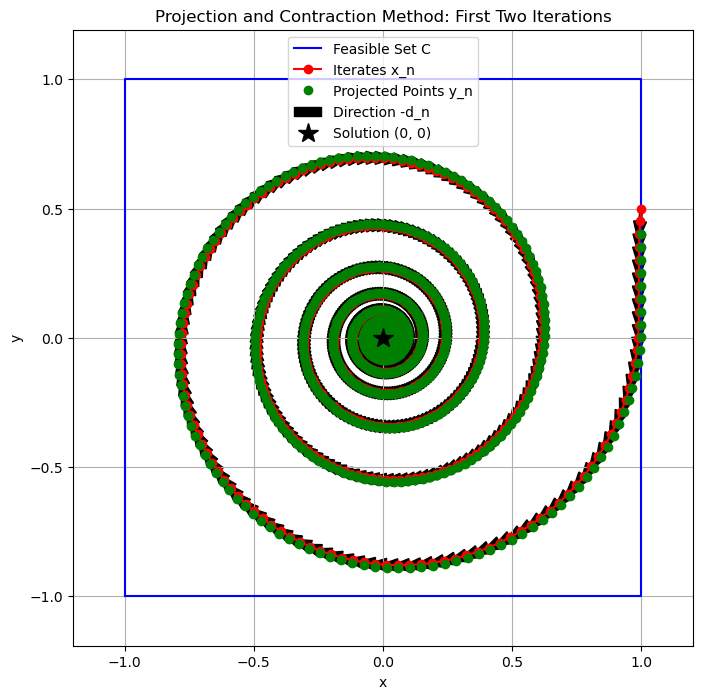

Iteration 0:
x_0 = [1.  0.5]
y_0 = [1.  0.4]
d_0 = [0.01 0.1 ]
x_1 = [0.995 0.45 ]

Iteration 1:
x_1 = [0.995 0.45 ]
y_1 = [1.     0.3505]
d_1 = [0.00495 0.1    ]
x_2 = [0.992525 0.4     ]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the operator F(x, y) = (-y, x)
def F(x):
    return np.array([-x[1], x[0]])

# Projection onto the square [-1, 1] x [-1, 1]
def project_square(x):
    return np.clip(x, -1, 1)

# Projection and Contraction Method (first two iterations)
def projection_contraction_method(x0, lambda_n, gamma, beta_n, max_iter=2000):
    x_n = np.array(x0, dtype=float)
    trajectory_x = [x_n.copy()]
    trajectory_y = []
    directions = []
    
    for n in range(max_iter):
        # Step 1: Compute y_n = P_C(x_n - lambda_n * F(x_n))
        Fx_n = F(x_n)
        y_n = project_square(x_n - lambda_n * Fx_n)
        trajectory_y.append(y_n.copy())
        
        # Step 2: Compute d_n = x_n - y_n - lambda_n * (F(x_n) - F(y_n))
        Fy_n = F(y_n)
        d_n = x_n - y_n - lambda_n * (Fx_n - Fy_n)
        directions.append(d_n.copy())
        
        # Step 3: Update x_{n+1} = x_n - gamma * beta_n * d_n
        x_n = x_n - gamma * beta_n * d_n
        trajectory_x.append(x_n.copy())
    
    return trajectory_x, trajectory_y, directions

# Parameters
x0 = np.array([1, 0.5])  # Initial point
lambda_n = 0.1
gamma = 1.0
beta_n = 0.5

# Run the algorithm for two iterations
trajectory_x, trajectory_y, directions = projection_contraction_method(x0, lambda_n, gamma, beta_n)

# Visualization
plt.figure(figsize=(8, 8))
# Plot the square [-1, 1] x [-1, 1]
square = np.array([[-1, -1], [1, -1], [1, 1], [-1, 1], [-1, -1]])
plt.plot(square[:, 0], square[:, 1], 'b-', label='Feasible Set C')
# Plot iterates x_n
trajectory_x = np.array(trajectory_x)
plt.plot(trajectory_x[:, 0], trajectory_x[:, 1], 'ro-', label='Iterates x_n')
# Plot projected points y_n
trajectory_y = np.array(trajectory_y)
plt.plot(trajectory_y[:, 0], trajectory_y[:, 1], 'go', label='Projected Points y_n')
# Plot directions d_n as arrows
for i, (x, d) in enumerate(zip(trajectory_x[:-1], directions)):
    plt.arrow(x[0], x[1], -0.5*d[0], -0.5*d[1], color='k', width=0.01, head_width=0.05,
              label='Direction -d_n' if i == 0 else "")
# Plot solution point (0, 0)
plt.plot(0, 0, 'k*', markersize=15, label='Solution (0, 0)')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Projection and Contraction Method: First Two Iterations')
plt.legend()
plt.axis('equal')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.show()

# Print results
print("Iteration 0:")
print(f"x_0 = {trajectory_x[0]}")
print(f"y_0 = {trajectory_y[0]}")
print(f"d_0 = {directions[0]}")
print(f"x_1 = {trajectory_x[1]}")
print("\nIteration 1:")
print(f"x_1 = {trajectory_x[1]}")
print(f"y_1 = {trajectory_y[1]}")
print(f"d_1 = {directions[1]}")
print(f"x_2 = {trajectory_x[2]}")